In [127]:
import pandas as pd
import numpy as np

In [128]:
data_train = pd.read_csv('train.csv', encoding='utf-8')
data_test = pd.read_csv('test.csv', encoding='utf-8')
print(data_train.shape)
data_train.head(5)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
print(data_test.shape)
data_test.head(5)

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
from keras.utils import to_categorical
X_train = data_train.iloc[:,1:].values.reshape(-1, 28, 28, 1)
# print(X_train)

y_train = to_categorical(data_train['label'])
print(y_train)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


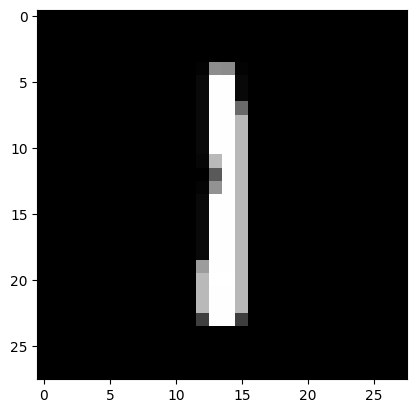

In [131]:
import matplotlib.pyplot as plt

plt.imshow(X_train[2], cmap='gray')
plt.show()

In [132]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [133]:
model = Sequential([Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
                   MaxPooling2D(pool_size=(2, 2)),
                   Conv2D(64, kernel_size=(3, 3), activation='relu'),
                   MaxPooling2D(pool_size=(2, 2)),
                   Flatten(),
                   Dense(128, activation='relu'),
                   Dense(10, activation='softmax')])

In [134]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [135]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1050/1050 [==============================] - 12s 11ms/step - loss: 0.5903 - accuracy: 0.9287 - val_loss: 0.0916 - val_accuracy: 0.9750
Epoch 2/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0836 - accuracy: 0.9752 - val_loss: 0.0829 - val_accuracy: 0.9779
Epoch 3/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0554 - accuracy: 0.9832 - val_loss: 0.0715 - val_accuracy: 0.9785
Epoch 4/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0460 - accuracy: 0.9847 - val_loss: 0.0641 - val_accuracy: 0.9805
Epoch 5/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0380 - accuracy: 0.9871 - val_loss: 0.0811 - val_accuracy: 0.9806
Epoch 6/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0299 - accuracy: 0.9912 - val_loss: 0.0842 - val_accuracy: 0.9826
Epoch 7/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.0910 -

In [136]:
X_test = pd.read_csv('test.csv', encoding='utf-8').values.reshape(-1, 28, 28, 1)

predictions = model.predict(X_test)

875/875 [==============================] - 3s 3ms/step


In [137]:
predicted_classes = np.argmax(predictions, axis=1)

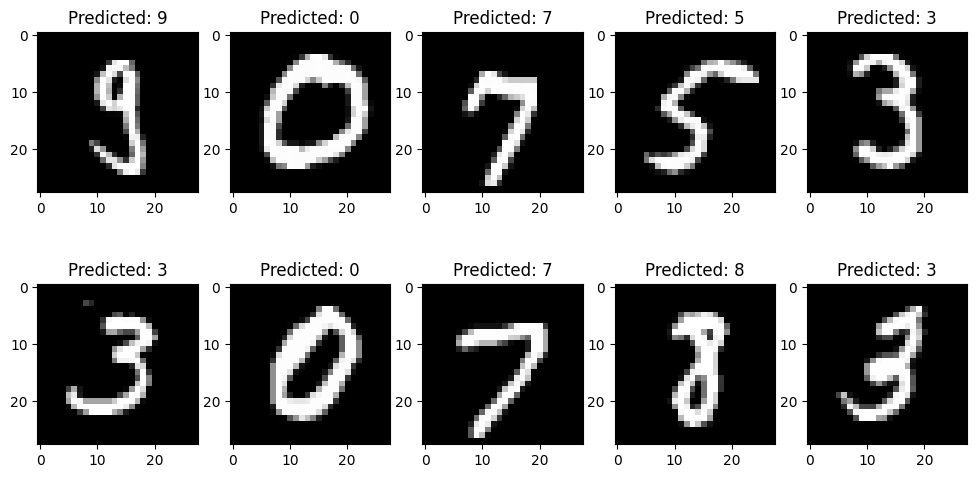

In [175]:
import matplotlib.pyplot as plt

image_indices = [101, 111, 121, 131, 141, 151, 161, 171, 181, 119]  # Например, здесь выбраны первые 10 изображений

# Создайте подзаголовки для каждого изображения
subtitles = []

# Создайте subplot с 2 рядами и 5 столбцами для отображения 10 изображений
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, image_index in enumerate(image_indices):
    image = X_test[image_index]  # X_test - массив с тестовыми изображениями
    predicted_class = predicted_classes[image_index]  # predicted_classes - предсказанные классы модели

    # Добавьте подзаголовок с предсказанным классом к списке подзаголовков
    subtitles.append(f'Predicted: {predicted_class}')

    # Выведите изображение в subplot
    row = i // 5
    col = i % 5
    axes[row, col].imshow(image.reshape(28, 28), cmap='gray')
    axes[row, col].set_title(subtitles[i])
plt.show()

<h3>Предсказания своего изображения</h3>

In [189]:
from PIL import Image

image = Image.open('img.png')
image = image.resize((28, 28))
image = image.convert('L')
image_array = np.array(image)
image_array = image_array.reshape(-1, 28, 28, 1)
predicted_class = model.predict(image_array)
predicted_class = np.argmax(predicted_class)

print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 20ms/step
Predicted class: 6
